In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots

In [3]:
include("../../src/NanoOpt.jl")

KsspSlab (generic function with 1 method)

In [4]:
λ₀ = 532
k₀ = 2π/λ₀

kₛₚₚ = k₀*sin((π/180)*80);

In [5]:
λbp(θ::Number,ϕ::Number) = λ₀/(sin((π/180)*80) + sin(θ)*cos(ϕ))
λbn(θ::Number,ϕ::Number) = λ₀/(sin((π/180)*80) - sin(θ)*cos(ϕ))

λbn (generic function with 1 method)

In [32]:
θA = 70:0.5:79
θAr= (π/180).*θA

ϕ = -0
ϕr = (π/180)*ϕ;

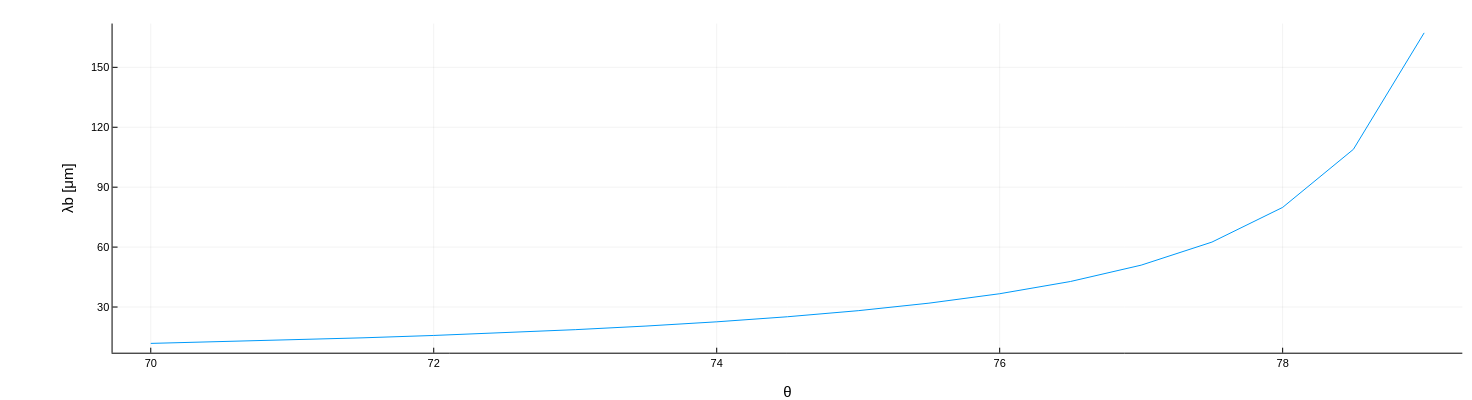

In [33]:
plot(θA ,λbn.(θAr,ϕr)./1000,label="",xlabel = "θ",ylabel="λb [μm]")

In [36]:
ϕA = -30:1:30

ϕAr = (π/180).*ϕA;


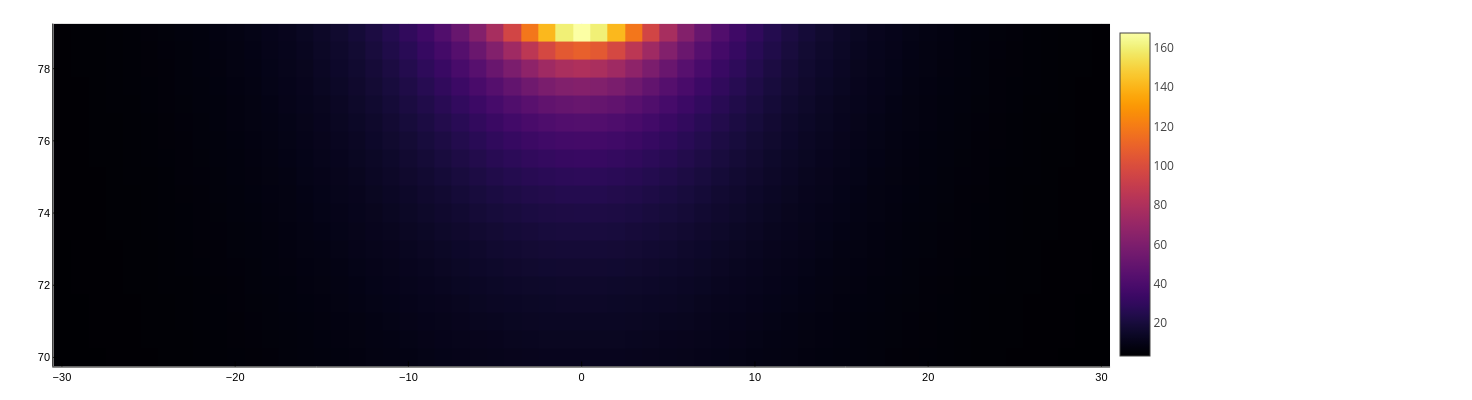

In [37]:
λArr = [λbn(θr,ϕr) for θr ∈ θAr, ϕr ∈ ϕAr]

heatmap(ϕA,θA,λArr./1000)

In [42]:
nₛₛₚ = kₛₚₚ/k₀;

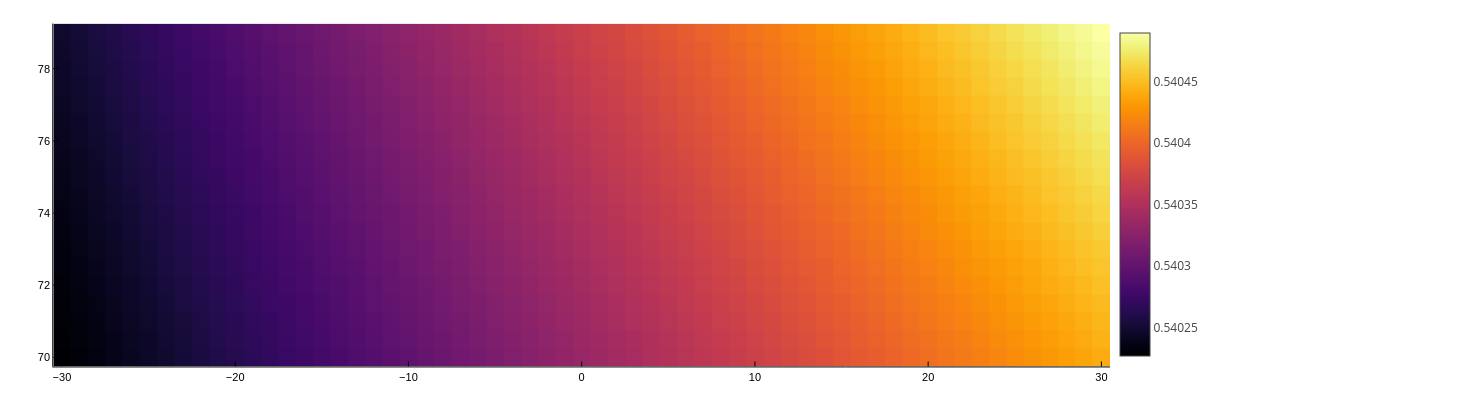

In [44]:
λArre = [Λedge(θr,ϕr,λ₀,nₛₛₚ) for θr ∈ θAr, ϕr ∈ ϕAr]

heatmap(ϕA,θA,λArre./1000)